loading surrogate mode... l2_m2

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_amp = 7
num_fits_phase = 7
setting norm fitparams to None...
Surrogate interval [[0.39794001]
 [4.        ]]
Surrogate time grid [-30500.         -30499.8        -30499.6        ...    114.40000011
    114.60000011    114.80000011]
Surrogate parameterization map from q to log10(q)
  
  Surrogates with this parameterization expect its user intput 
  to be the mass ratio q. 
  
  The surrogate will map q to the internal surrogate's 
  parameterization which is log10(q)
  
  The surrogates training interval is quoted in log10(q).
  


Text(0, 0.5, '$\\partial_t f (f)$')

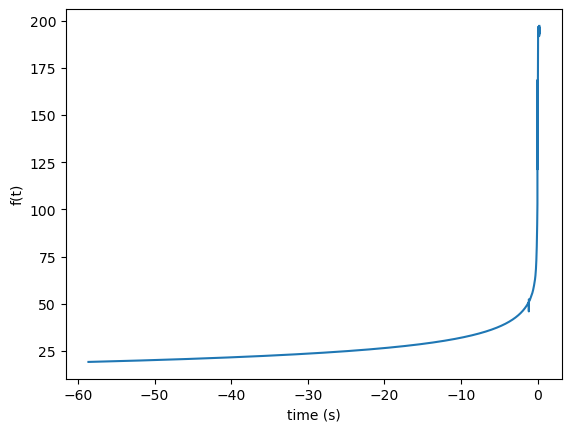

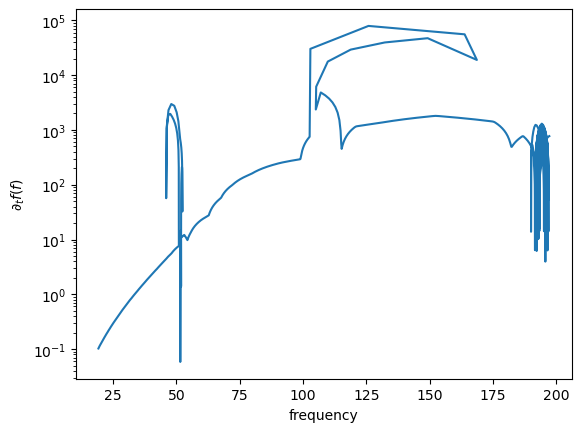

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys

import gwsurrogate as gws
import gwtools

# download the model - NOTE... only need to run this once and the file will download
#gws.catalog.pull('BHPTNRSur1dq1e4')

# load the model
path_to_gws = '/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/'
sys.path.append(path_to_gws)
path_to_surrogate = path_to_gws+'surrogate_downloads/BHPTNRSur1dq1e4.h5'
model = gws.EvaluateSurrogate(path_to_surrogate, ell_m=[(2,2)]) 

# evaluate the model 
mass=400 # Total masss in solar masses
dist_mpc=500 # distance in megaparsec
q = 50 # mass ratio
inclination = np.pi/4 
phi_ref = np.pi/5

# when mode_sum=True, (2,2) mode must be included in ell, m
times, hp, hc = model(q=q, M=mass, dist=dist_mpc, theta=inclination, phi=phi_ref, ell=[2], m=[2], mode_sum=True, fake_neg_modes=False)
h = hp - 1.0j*hc

# compute frequency information
orbital_frequency = gwtools.orbital_frequency_from_hlm(h,times,2)
gw_frequency = 2*orbital_frequency
plt.figure(1)
plt.plot(times,gw_frequency)
plt.xlabel("time (s)")
plt.ylabel("f(t)")
plt.figure(2)
plt.semilogy(gw_frequency,np.abs(np.gradient(gw_frequency,times)))
plt.xlabel("frequency")
plt.ylabel("$\partial_t f (f)$")